In [4]:
import pandas as pd
import numpy as np
import talib
from futuquant import OpenQuoteContext

from matplotlib import rc
rc('mathtext', default='regular')
import seaborn as sns
sns.set_style('white')


def get_data():
    quote_ctx = OpenQuoteContext(host='192.168.254.202', port=11111)

    # quote_ctx.get_market_snapshot()

    history_data = quote_ctx.get_history_kline("SH.600570", start='2018-7-20', ktype='K_DAY')
    
    data_frame = None
    if history_data[0] != -1:
        data_frame = pd.DataFrame(history_data[1])
        
    quote_ctx.close()
    return data_frame

dw = get_data()
print(dw)








2019-02-18 18:10:11,847 [open_context_base.py] _socket_reconnect_and_wait_ready:207: Start connecting: host=192.168.254.202; port=11111;
2019-02-18 18:10:11,848 [open_context_base.py] on_connected:289: Connected : conn_id=1; 
2019-02-18 18:10:11,850 [open_context_base.py] _handle_init_connect:378: InitConnect ok: conn_id=1; info={'server_version': 103, 'login_user_id': 11832306, 'conn_id': 7595094844608716405, 'conn_key': '749E4D488533670F', 'keep_alive_interval': 10};


          code             time_key       open      close       high  \
0    SH.600570  2018-07-20 00:00:00  50.570000  52.139999  52.500000   
1    SH.600570  2018-07-23 00:00:00  52.090000  53.509998  54.389999   
2    SH.600570  2018-07-24 00:00:00  53.500000  53.869999  55.250000   
3    SH.600570  2018-07-25 00:00:00  54.009998  53.799999  54.980000   
4    SH.600570  2018-07-26 00:00:00  53.689999  52.580002  53.950001   
5    SH.600570  2018-07-27 00:00:00  52.500000  52.029999  52.840000   
6    SH.600570  2018-07-30 00:00:00  52.000000  50.970001  52.820000   
7    SH.600570  2018-07-31 00:00:00  50.799999  51.160000  51.529999   
8    SH.600570  2018-08-01 00:00:00  51.369999  50.910000  52.099998   
9    SH.600570  2018-08-02 00:00:00  50.599998  49.279999  50.790001   
10   SH.600570  2018-08-03 00:00:00  48.880001  48.160000  49.490002   
11   SH.600570  2018-08-06 00:00:00  48.340000  47.500000  48.639999   
12   SH.600570  2018-08-07 00:00:00  47.500000  48.459999  48.50

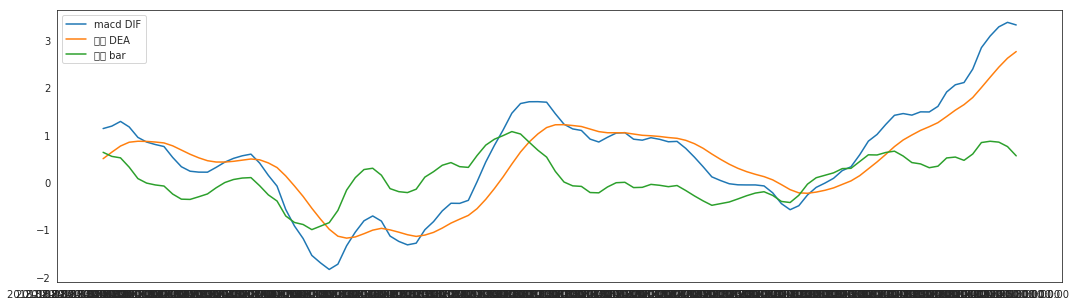

In [5]:
import matplotlib.pyplot as plt

df = talib.MACD(dw['last_close'], fastperiod=12, slowperiod=26, signalperiod=9)

fig = plt.figure(figsize=[18,5])
plt.plot(dw['time_key'],df[0],label='macd DIF') #差离值 EMA12-EMA26
plt.plot(dw['time_key'],df[1],label='信号 DEA')  #讯号线 根据DIF 算出9天的指数移动平均值EMA(DIF9)
plt.plot(dw['time_key'],df[2],label='差值 bar') #DIF与DEM的差
plt.legend(loc='best')

In [6]:
df[0].tail(1)

138    3.327866
dtype: float64

In [7]:
df[1].tail(1)

138    2.765743
dtype: float64

In [8]:
df[0].tail(1) - df[1].tail(1)

138    0.562123
dtype: float64

In [18]:
a = df[0].to_frame('DIF')

In [17]:
a.append(dw['time_key'],ignore_index=True)

,DIF,0,1,2,3,4,5,6,7,8,...,129,130,131,132,133,134,135,136,137,138
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.concat([dw['time_key'],a])

,0,DIF
0,2018-07-20 00:00:00,NaN
1,2018-07-23 00:00:00,NaN
2,2018-07-24 00:00:00,NaN
3,2018-07-25 00:00:00,NaN
4,2018-07-26 00:00:00,NaN
5,2018-07-27 00:00:00,NaN
6,2018-07-30 00:00:00,NaN
7,2018-07-31 00:00:00,NaN
8,2018-08-01 00:00:00,NaN
9,2018-08-02 00:00:00,NaN


In [20]:
dw['time_key']

0      2018-07-20 00:00:00
1      2018-07-23 00:00:00
2      2018-07-24 00:00:00
3      2018-07-25 00:00:00
4      2018-07-26 00:00:00
5      2018-07-27 00:00:00
6      2018-07-30 00:00:00
7      2018-07-31 00:00:00
8      2018-08-01 00:00:00
9      2018-08-02 00:00:00
10     2018-08-03 00:00:00
11     2018-08-06 00:00:00
12     2018-08-07 00:00:00
13     2018-08-08 00:00:00
14     2018-08-09 00:00:00
15     2018-08-10 00:00:00
16     2018-08-13 00:00:00
17     2018-08-14 00:00:00
18     2018-08-15 00:00:00
19     2018-08-16 00:00:00
20     2018-08-17 00:00:00
21     2018-08-20 00:00:00
22     2018-08-21 00:00:00
23     2018-08-22 00:00:00
24     2018-08-23 00:00:00
25     2018-08-24 00:00:00
26     2018-08-27 00:00:00
27     2018-08-28 00:00:00
28     2018-08-29 00:00:00
29     2018-08-30 00:00:00
              ...         
109    2018-12-28 00:00:00
110    2019-01-02 00:00:00
111    2019-01-03 00:00:00
112    2019-01-04 00:00:00
113    2019-01-07 00:00:00
114    2019-01-08 00:00:00
1